<font size = 5>**Logistic Regression** - Superived Classification learning</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# Load dataset using Pandas
df= pd.read_csv('C:\\Users\POOJA\Downloads\python\Projects\Logistic Regression\\HR_comma_sep.csv')

In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df['left'].unique()

array([1, 0], dtype=int64)

left column signifies if employee left the company [1] or not [0] which is categorical variable that will be out dependent variable in this exaample

<font size = 3>**Exploratory Data Analysis**</font>

In [9]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


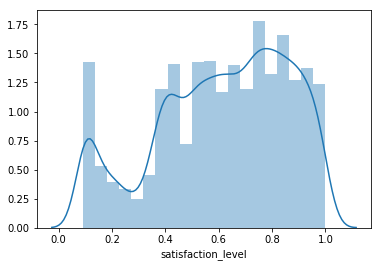

In [11]:
sns.distplot(df['satisfaction_level'],bins=20)

**Let's create jointplot using attributes satisfaction_level and number_project**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


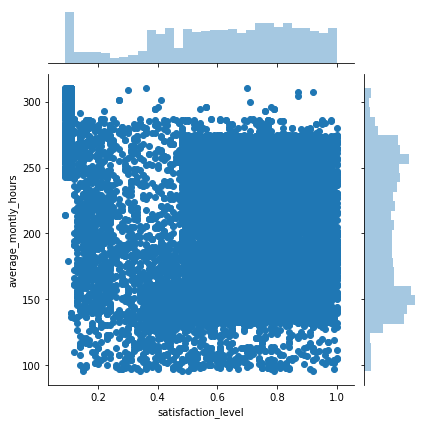

In [26]:
sns.jointplot(df['satisfaction_level'],df['average_montly_hours'],dropna=True)

**Create a jointplot showing the kde distributions of satisfaction_level vs. Age.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


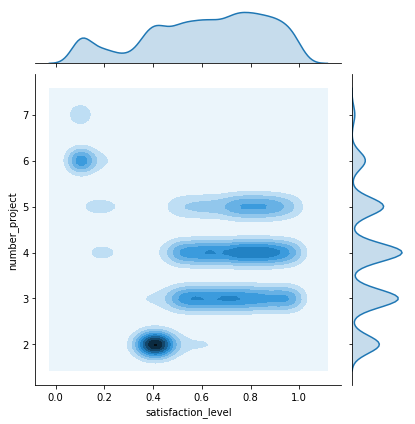

In [27]:
sns.jointplot(df['satisfaction_level'],df['number_project'],kind='kde')

**Finally, create a pairplot with the hue defined by the 'left' column feature.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


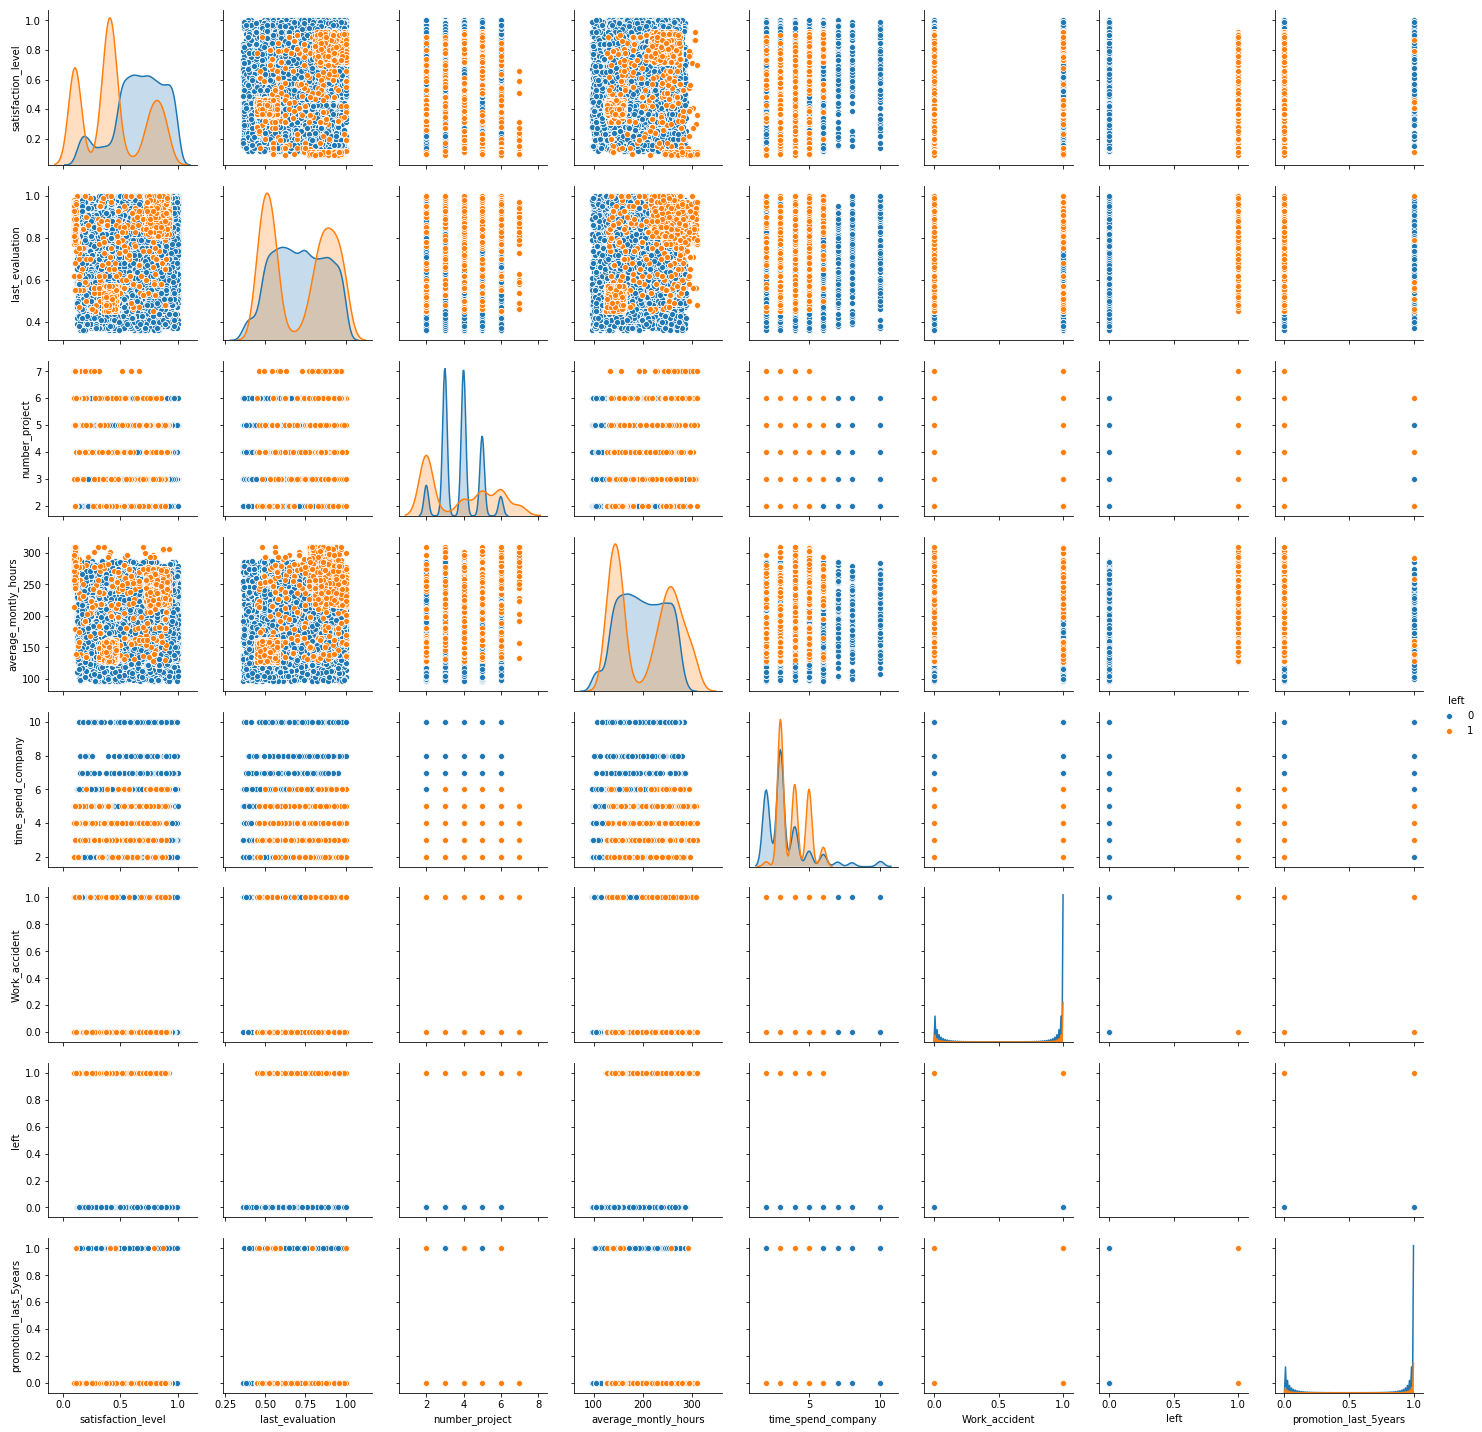

In [28]:
sns.pairplot(df,hue='left')

<font size = 3>**Logistic Regression**</font>

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

In [34]:
# Let's take independent variable = 'satisfaction_level' and dependent variable= 'left'
# our hypothesis will be if employee has high satisfaction level then he is not likely to leave company and vice a versa
from sklearn.linear_model import LogisticRegression

**Model Training**

In [35]:
lor= LogisticRegression()

Here, you need to divide the given columns into two types of variables dependent(df['left']) and independent variable(df[Satisfction-level).

In [36]:
x = df['satisfaction_level'].values.reshape(-1,1)
y = df['left'].values.reshape(-1,1)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

fit your model on the train set using fit() and perform prediction on the test set using predict().

In [38]:
lor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
#predict() function is used to predict values of dependent attribute using test dataset
y_pred= lor.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
#Now lets predict for different values from user
# ex. satisfaction_level= 0.72 we need to predict if employee is likely to leave or not

lor.predict(0.72)

array([0], dtype=int64)

output array([0]) means employee is likely not to leave company when satisfaction_level is 0.72

In [41]:
lor.predict(0.2)

array([1], dtype=int64)

output array([1]) means employee is likely to leave company when satisfaction_level is 0.2









**Model Evaluation using Confusion Matrix**


A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [42]:
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2101,  165],
       [ 556,  178]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 2089 and 206 are actual predictions, and 534 and 171 are incorrect predictions.

Text(0.5,257.44,'Predicted label')

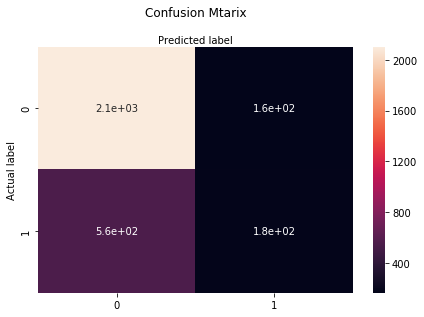

In [43]:
#Visualizing Confusion Matrix using Heatmap
#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
import seaborn as sns
import numpy as np
fig_size=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(fig_size))
plt.xticks(tick_marks,fig_size)
plt.yticks(tick_marks,fig_size)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)#,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Mtarix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion Matrix Evaluation Metrics**
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [44]:
print('Accuracy is :',metrics.accuracy_score(y_test,y_pred))
print('precision is :',metrics.precision_score(y_test,y_pred))
print('recall is :',metrics.recall_score(y_test,y_pred))

Accuracy is : 0.7596666666666667
precision is : 0.5189504373177842
recall is : 0.24250681198910082


**Well, you got a classification rate of 76%, considered as good accuracy.**

**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted employee likely to leave is  54% of the time.

**Recall:** If there are employees who have left in the test set and your Logistic Regression model can identify it 27% of the time.

In [45]:
print(lor.intercept_)  # part of y which cannot be explained by x
print(lor.coef_)   # impact of x on y

[0.93652713]
[[-3.77515913]]


In [46]:
#to predict the probability of an outcome,  predict fn takes value of parameter that necessary for transformation. our intercept is 0.7, lets consider out probability cutoff is 0.5
lor.predict_proba(x_test)

array([[0.61308101, 0.38691899],
       [0.77783001, 0.22216999],
       [0.9362925 , 0.0637075 ],
       ...,
       [0.67360661, 0.32639339],
       [0.8604868 , 0.1395132 ],
       [0.83624923, 0.16375077]])

As you can tell above, the predict_proba function returns 2 values corresponding to the probability of the 0 labels and the 1 label correspondingly. Reading above, we have that at the satisfaction level=x we have an 68% probability of employees not leaving (label 0) and a 31% probability of employee leaving (label 1).

In [52]:
#Let's check our prediction model, for example when satisfaction level is 0.68
lor.predict_proba(0.68) 

array([[0.83624923, 0.16375077]])

There 83% chances that employee might not leave and 16% that he might leave

In [48]:
lor.predict_proba(0.25)

array([[0.50181566, 0.49818434]])

there 49% chances that employee might not leave and 50% that he might leave




**ROC Curve**

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [49]:
#The first column is the probability that the entry has the -1 label and the second column is the probability that the entry has the +1 label.
#If you would like to get the predicted probabilities for the positive label only, you can use logistic_model.predict_proba(data)[:,1]. This will yield you the [9.95342389e-01, 2.41487300e-02, 1.66258341e-05] result.
y_pred_proba=lor.predict_proba(x_test)[:,1]  

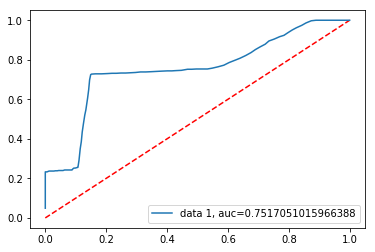

In [50]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.74 whichis close to 1 that means our classifier is perfect. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

<font size=3>**Multiple Logistic Regression**</font>

multiple logistic regression analysis applies when there is a single dichotomous outcome and more than one independent variable.


In [54]:
#lets split our data set for train and test model
train=df.iloc[:10000,:]
test = df.iloc[10001:,:]
lor1 =LogisticRegression()

**Model Training**

In [55]:
lor1.fit(train[['satisfaction_level','number_project']],train['left'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print(lor1.intercept_)  # part of y which cannot be explained by x
print(lor1.coef_)   # impact of x on y

[1.22279827]
[[-3.98705197 -0.10242602]]


In [57]:
y_pred1= lor1.predict(train[['satisfaction_level','number_project']])
y_pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
y_pred_proba1 = lor1.predict_proba(train[['satisfaction_level','number_project']])
y_pred_proba1

array([[0.62178546, 0.37821454],
       [0.92265457, 0.07734543],
       [0.48319623, 0.51680377],
       ...,
       [0.83701626, 0.16298374],
       [0.84008734, 0.15991266],
       [0.58077736, 0.41922264]])

By taking multiple independent variable we have got different output of predict,intercept and coef from single independent

In [59]:
# ex. satisfaction_level= 0.72 and number_project=7 we need to predict if employee is likely to leave or not
lor1.predict([[0.72,7]])

array([0], dtype=int64)

If satisfaction_level is 0.72 and number_project assigned to employee are 7 the employee is not likely to leave company.

In [60]:
lor1.predict([[0.1,3]])

array([1], dtype=int64)

If satisfaction_level is 0.1 and number_project assigned to employee are 3 the employee is likely to leave company.

In [61]:
lor1.predict_proba([[0.4,2]])

array([[0.64034793, 0.35965207]])

If satisfaction_level is 0.4 and number_project assigned to employee are 2 the probability of employee is not likely to leave company is 64% and the probability of employee is likely to leave company is 35%.

In [62]:
lor1.predict_proba([[0.1,5]])

array([[0.42263567, 0.57736433]])

If satisfaction_level is 0.1 and number_project assigned to employee are 5 the probability of employee is not likely to leave company is 42% and the probability of employee is likely to leave company is 57%.